# The Inception family (GoogleNet)
Esta publicado en 2015, por Szegedy, et. al. (google)
Ganador del concurso ILSVRC (ImageNet Large Scale Visual Recognition Challenge)

La idea es que hasta este momento las CNN son una tras otra ("sequential").  Esto creaba un "chorizo" de redes.
La idea novedosa del Inception Family, es que rompen esta tradicion de redes secuenciales y comienzan una tradicion de redes "en paralelo".  Las redes se construyen con lo que llaman "inception blocks".  El nombre de "incepcion" viene de la la pelicula "inception".



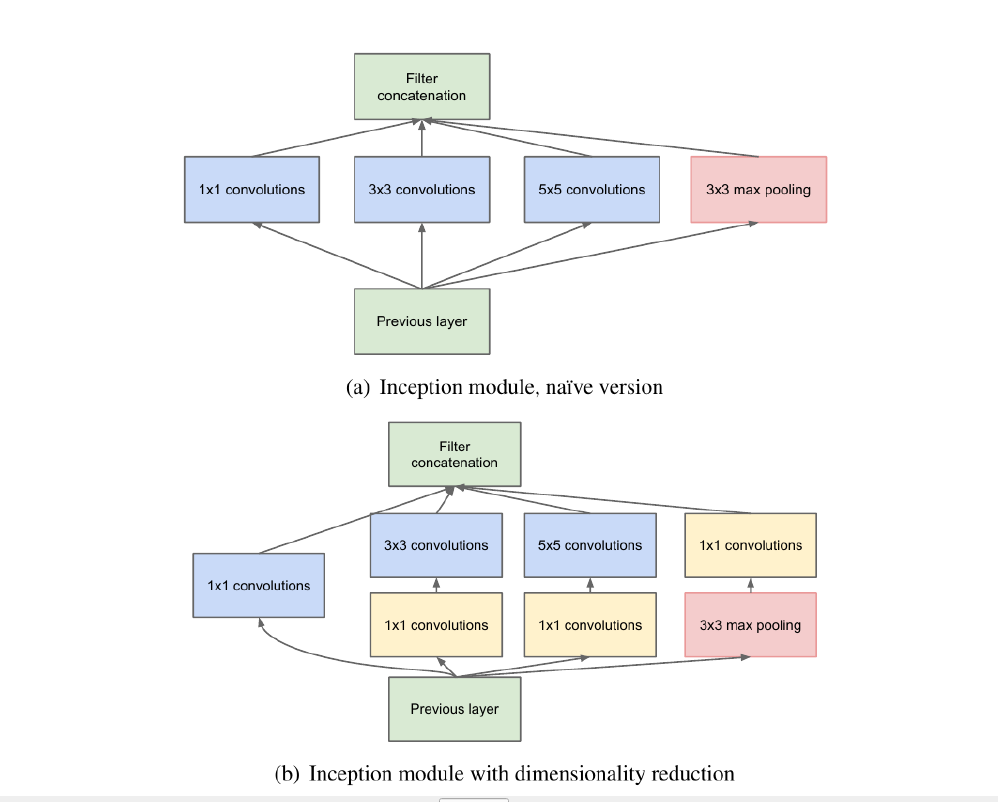

Que sentido tiene una convolucion 1x1 ?

Vamos a la matematica:
Asumamos un filtro (kernel) con indices $f_{ijl}$ donde $i,j$ son las dimensiones del kernen en $x-y$ y $l$ es en la profundidad del filtro, o el numero de filtros de salido. La salida esta dada
por

$$\text{out}_{ij} = \sum_{l=1}^{k} f_{ijl} \text{in}_{ijl} .$$
$i=1,2, \cdots, \text{width}$, $j=1,2, \cdots, \text{height} $
Se colapsa la dimension a lo largo de $l$.

La convolucion 1x1 colapsa la profundidad con respect al numero de filtros de entrada. Esto no quiere decir que podamos tener num numero dado de filtros de salida.


$$\text{out}_{ij}^p = \sum_{l=1}^{k} f_{ijl}^p \text{in}_{ijl} .$$
$i=1,2, \cdots, \text{width}$, $j=1,2, \cdots, \text{height} $
$ p=1,2, \cdots, n_f$, donde $n_f$ son filtros de salida.

La convolucion 1x1 le genera un reduccion en el tamano de la red (parametros).
El numero de parametros que se necesitan son
$$ \#\text{parameters} = (1 \times 1 \times \text{depth} + 1) \times nf .$$


Vamos a ver un ejemplo donde la convolucion 1x1 produce una reduccion del 66%

Asumamos
que tenemos unos datos de entrada de $224 \times 224 \times 3$.
Que queremos hacer una convolucin con un kernel de $5 \times 5$
con "padding same". con 256 filtros.
El numero de multiplicaciones

$$ \#\text{parameters} = 5 \times 5 \times \times 224 \times 224 \times 3 \times 256 =  963379200  .$$

Es interesante que podemos reducir este numero el 66% haciendo dos convoluciones donde una de ellas es 1x1.


$$ 1*1*224*224*3*1 + 5*5*224*224*1*256 = 321276928
  .$$


La convolucion 1x1 basicamente lo que hace es sumar a lo largo de la profundidad (de los filtros de entrada).

Hay varios tipos de modelos de "inception"

* [la original Inception v1](https://arxiv.org/abs/1409.4842).

* [la Inception v2, v3](https://arxiv.org/pdf/1512.00567v3.pdf).

* [Inception v4 y ResNet](https://arxiv.org/pdf/1602.07261.pdf).

*Xception (X=extreme). Sugerida por Francois Chellet (frances). En su articulo.
 François Chollet. Xception: Deep learning with depthwise separable convolutions.
CoRR, abs/1610.02357, 2016.

Hay un "blog" muy bueno sobre este tipo de red.
[blog on Inception: Towards Data Science](https://towardsdatascience.com/a-simple-guide-to-the-versions-of-the-inception-network-7fc52b863202).





El siguiente enlace es muy ilustrativo para comparar las redes (CNN) que hemos visto en clase.

[Visualizacion de Arquitecturas de CNN (Josepth P. Cohen](https://josephpcohen.com/w/visualizing-cnn-architectures-side-by-side-with-mxnet/).



Implementacion de los "inception blocks"


In [4]:
# funcion para implementar el bloque de incepcion  "ingenuo"
def inception_module(layer_in, f1, f2, f3):
    # 1x1 convolution
    conv1 = Conv2D( f1, (1,1), padding='same', activation='relu')(layer_in)

    # 3x3 convolution
    conv3 = Conv2D( f1, (3,3), padding='same', activation='relu')(layer_in)

    # 5x5 convolution
    conv5 = Conv2D( f1, (5,5), padding='same', activation='relu')(layer_in)

    # max pooling
    pool=MaxPooling2D((3,3), strides=(1,1), padding='same')(layer_in)

    # concatenation
    layer_out = concatenate( [conv1, conv3, conv5, pool], axis=-1 )
    return layer_out




In [5]:
# funcion para implementar el bloque de inception "avanzado"
def inception_module( layer_in, f1, f2_in, f2_out, f3_in, f3_out, f4_out):
    # primera convolucion 1x1
    conv1 = Conv2D(f1, (1,1), padding='same', activation='relu')(layer_in)

    # segunda convolucion 1x1
    conv12 = Conv2D(f2_in, (1,1), padding='same', activation='relu')(layer_in)


    # max pooling
    pool = MaxPooling2D( (3,3), strides=(1,1), padding='same')(layer_in)

    # segundo nivel.
    # convolucion 3x3
    conv3 = Conv2D(f2_out, (3,3), padding='same', activation='relu')(conv1)

    # convolucion 5x5
    conv5 = Conv2D(f3_out, (5,5), padding='same', activation='relu')(conv12)

    # convolucion 1x1
    conv121 = Conv2D(f4_out, (1,1), padding='same', activation='relu')(pool)

    # concatenacion
    layer_out=concatenate( [conv1, conv3, conv5, conv121], axis=-1)
    return layer_out

# Proxima clase la ResNet (Residual Net).